In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,NaN,1.0,1.0,1.0,1.0,0,0,0.0,2.0,NaN,...,0.0,0,0.0,0.0,0,0.0,0.0,0.0,2.0,0
1,1.0,1.0,2.0,0.0,0.0,0,3,0.0,3.0,0.0,...,0.0,0,0.0,0.0,0,2.0,2.0,2.0,0.0,7
2,2.0,2.0,1.0,0.0,0.0,0,3,0.0,2.0,NaN,...,0.0,0,0.0,2.0,0,3.0,3.0,2.0,0.0,7
3,2.0,2.0,2.0,1.0,0.0,0,2,0.0,NaN,2.0,...,0.0,0,0.0,2.0,0,2.0,2.0,2.0,0.0,7
4,2.0,2.0,1.0,0.0,0.0,0,2,0.0,2.0,0.0,...,0.0,0,0.0,3.0,0,2.0,2.0,2.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,2.0,NaN,2.0,1.0,0,0,0.0,0.0,NaN,...,0.0,0,0.0,NaN,0,0.0,0.0,3.0,0.0,70
354,2.0,3.0,2.0,0.0,0.0,0,0,0.0,3.0,NaN,...,0.0,0,0.0,0.0,0,0.0,0.0,1.0,0.0,70
355,NaN,2.0,2.0,1.0,0.0,0,0,0.0,0.0,0.0,...,0.0,0,0.0,2.0,0,0.0,0.0,2.0,0.0,70
356,2.0,1.0,0.0,3.0,0.0,0,0,NaN,0.0,0.0,...,0.0,0,NaN,0.0,0,0.0,0.0,NaN,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
float64		column 2	36
float64		column 3	37
float64		column 4	37
float64		column 5	18
int64		column 6	0
int64		column 7	0
float64		column 8	55
float64		column 9	18
float64		column 10	55
int64		column 11	0
float64		column 12	19
int64		column 13	0
float64		column 14	19
int64		column 15	0
int64		column 16	0
float64		column 17	18
float64		column 18	18
int64		column 19	0
float64		column 20	37
int64		column 21	0
int64		column 22	0
float64		column 23	36
int64		column 24	0
float64		column 25	36
int64		column 26	0
float64		column 27	18
float64		column 28	18
int64		column 29	0
float64		column 30	37
float64		column 31	18
float64		column 32	18
float64		column 33	18
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,340.000000,322.000000,321.000000,321.000000,340.000000,358.000000,358.000000,303.000000,340.000000,303.000000,...,322.00000,358.000000,340.000000,340.000000,358.000000,321.000000,340.000000,340.000000,340.000000,358.000000
mean,2.079412,1.804348,1.604361,1.336449,0.632353,0.449721,0.170391,0.346535,0.573529,0.452145,...,0.39441,0.474860,0.452941,0.944118,0.458101,0.102804,0.114706,1.888235,0.511765,36.296089
std,0.649156,0.689652,0.856508,1.114764,0.907270,0.956468,0.576394,0.815036,0.954977,0.835979,...,0.86271,0.871705,0.956652,1.115641,0.959796,0.452795,0.493397,0.690759,1.065624,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.00000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

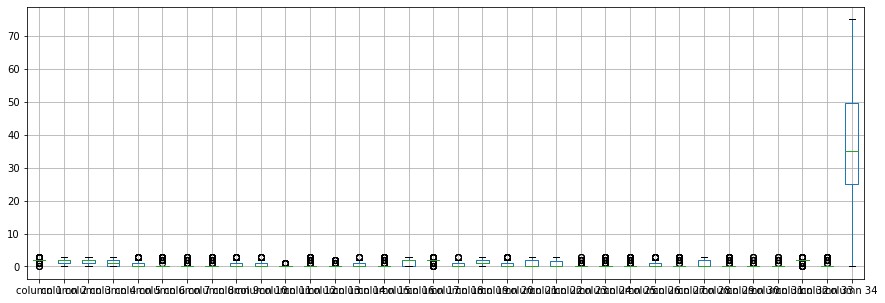

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.079412
column 2      1.804348
column 3      1.604361
column 4      1.336449
column 5      0.632353
column 6      0.449721
column 7      0.170391
column 8      0.346535
column 9      0.573529
column 10     0.452145
column 11     0.122905
column 12     0.368732
column 13     0.142458
column 14     0.516224
column 15     0.315642
column 16     1.368715
column 17     1.947059
column 18     0.502941
column 19     1.287709
column 20     0.604361
column 21     0.983240
column 22     0.642458
column 23     0.267081
column 24     0.368715
column 25     0.394410
column 26     0.474860
column 27     0.452941
column 28     0.944118
column 29     0.458101
column 30     0.102804
column 31     0.114706
column 32     1.888235
column 33     0.511765
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.452850,0.230602,-0.035231,-0.002375,0.001194,-0.114004,-0.037787,0.136910,0.227766,...,-0.014721,0.148539,0.003534,0.046551,-0.009525,0.005559,-0.010420,0.086396,-0.004581,-0.016885
column 2,0.452850,1.000000,0.429586,-0.038127,0.014937,-0.038561,-0.106784,-0.080790,0.294297,0.353448,...,-0.058184,0.232531,-0.088628,0.023130,-0.100950,-0.015440,-0.023706,-0.014775,-0.132976,0.003505
column 3,0.230602,0.429586,1.000000,-0.037200,0.229240,0.304555,-0.140006,0.242763,0.308839,0.235094,...,0.246270,0.312321,0.268777,-0.254642,0.236066,-0.048419,-0.130806,0.085577,0.215081,0.115126
column 4,-0.035231,-0.038127,-0.037200,1.000000,0.267840,0.415569,-0.142436,0.338335,-0.331039,-0.162711,...,0.375211,-0.165191,0.384817,0.029795,0.374103,-0.188891,-0.167639,0.024462,0.343589,0.010605
column 5,-0.002375,0.014937,0.229240,0.267840,1.000000,0.391686,-0.175010,0.428014,-0.089647,-0.010919,...,0.396145,0.016849,0.413519,0.003740,0.385140,-0.140322,-0.160869,0.098512,0.365590,0.087996
column 6,0.001194,-0.038561,0.304555,0.415569,0.391686,1.000000,-0.139384,0.845683,-0.273319,-0.235622,...,0.893505,-0.122467,0.910588,0.106428,0.894775,-0.093736,-0.109019,0.276820,0.900433,0.096953
column 7,-0.114004,-0.106784,-0.140006,-0.142436,-0.175010,-0.139384,1.000000,-0.128564,0.227934,-0.027112,...,-0.141399,-0.161487,-0.144369,0.001119,-0.141489,0.784324,0.853006,-0.086304,-0.129382,-0.371368
column 8,-0.037787,-0.080790,0.242763,0.338335,0.428014,0.845683,-0.128564,1.000000,-0.274011,-0.239167,...,0.880927,-0.111577,0.890425,0.101009,0.877888,-0.071714,-0.096595,0.263769,0.876218,0.120162
column 9,0.136910,0.294297,0.308839,-0.331039,-0.089647,-0.273319,0.227934,-0.274011,1.000000,0.569949,...,-0.268818,0.485357,-0.278550,-0.407892,-0.277849,0.238845,0.260756,-0.067007,-0.257931,-0.071030
column 10,0.227766,0.353448,0.235094,-0.162711,-0.010919,-0.235622,-0.027112,-0.239167,0.569949,1.000000,...,-0.236604,0.489867,-0.224590,-0.395345,-0.238418,-0.008912,0.019762,0.037398,-0.241024,0.077522


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+31,34+31+31,34+31+31+31,34+31+31+31+31,34+31+31+31+31+31,34+31+31+31+31+31+31,34+31+31+31+31+31+31+31,34+31+31+31+31+31+31,34+31+31+31+31+31,34+31+31+31+31,34+31+31+31,34+31+31,34+31,34], vae_layer = False, seed = 31)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 74.33120415427469
Epoch: 1 , loss: 74.2717136036266
Epoch: 2 , loss: 74.0261906710538
Epoch: 3 , loss: 73.83010014620695
Epoch: 4 , loss: 74.02614142678
Epoch: 5 , loss: 73.59683400934392
Epoch: 6 , loss: 72.61861038208008
Epoch: 7 , loss: 69.91549110412598
Epoch: 8 , loss: 68.53615812821822
Epoch: 9 , loss: 67.86061026833274
Epoch: 10 , loss: 66.71504766290838
Epoch: 11 , loss: 66.5140535181219
Epoch: 12 , loss: 65.634258963845
Epoch: 13 , loss: 65.72338277643377
Epoch: 14 , loss: 65.25241296941584
Epoch: 15 , loss: 64.94547080993652
Epoch: 16 , loss: 64.80687280134721
Epoch: 17 , loss: 64.56325583024459
Epoch: 18 , loss: 63.8774110620672
Epoch: 19 , loss: 63.84320432489569
Epoch: 20 , loss: 63.5366302837025
Epoch: 21 , loss: 63.74296829917214
Epoch: 22 , loss: 62.92256337946112
Epoch: 23 , loss: 62.54328866438432
Epoch: 24 , loss: 62.10249051180753
Epoch: 25 , loss: 62.64562364058061
Epoch: 26 , loss

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.094456
column 9      3.000000
column 10     0.087162
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.480075,0.0,0.00000,0.0,0.0,0,0,0.000000,0.000000,-1.779771,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,0.000000,0
1,0.000000,0.0,0.00000,0.0,0.0,0,0,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,0.000000,0
2,0.000000,0.0,0.00000,0.0,0.0,0,0,0.000000,0.000000,0.224394,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,0.000000,0
3,0.000000,0.0,0.00000,0.0,0.0,0,0,0.000000,-1.619095,0.000000,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,0.000000,0
4,0.000000,0.0,0.00000,0.0,0.0,0,0,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.529266,0.0,1.19052,0.0,0.0,0,0,0.000000,0.000000,0.236078,...,0.0,0,0.000000,-2.35346,0,0.0,0.0,0.000000,0.000000,0
354,0.000000,0.0,0.00000,0.0,0.0,0,0,0.000000,0.000000,-1.819001,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,0.000000,0
355,0.495636,0.0,0.00000,0.0,0.0,0,0,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,0.000000,0
356,0.000000,0.0,0.00000,0.0,0.0,0,0,0.200829,0.000000,0.000000,...,0.0,0,0.255241,0.00000,0,0.0,0.0,0.556941,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(28.317356729418112, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.03735441483700057

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30    -0.010866
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.480075,1.0,1.00000,1.0,1.0,0,0,0.000000,2.000000,0.220229,...,0.0,0,0.000000,0.00000,0,0.0,0.0,0.000000,2.000000,0
1,1.000000,1.0,2.00000,0.0,0.0,0,3,0.000000,3.000000,0.000000,...,0.0,0,0.000000,0.00000,0,2.0,2.0,2.000000,0.000000,7
2,2.000000,2.0,1.00000,0.0,0.0,0,3,0.000000,2.000000,0.224394,...,0.0,0,0.000000,2.00000,0,3.0,3.0,2.000000,0.000000,7
3,2.000000,2.0,2.00000,1.0,0.0,0,2,0.000000,0.380905,2.000000,...,0.0,0,0.000000,2.00000,0,2.0,2.0,2.000000,0.000000,7
4,2.000000,2.0,1.00000,0.0,0.0,0,2,0.000000,2.000000,0.000000,...,0.0,0,0.000000,3.00000,0,2.0,2.0,2.000000,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1.470734,2.0,1.19052,2.0,1.0,0,0,0.000000,0.000000,0.236078,...,0.0,0,0.000000,0.64654,0,0.0,0.0,3.000000,0.000000,70
354,2.000000,3.0,2.00000,0.0,0.0,0,0,0.000000,3.000000,0.180999,...,0.0,0,0.000000,0.00000,0,0.0,0.0,1.000000,0.000000,70
355,2.495636,2.0,2.00000,1.0,0.0,0,0,0.000000,0.000000,0.000000,...,0.0,0,0.000000,2.00000,0,0.0,0.0,2.000000,0.000000,70
356,2.000000,1.0,0.00000,3.0,0.0,0,0,0.200829,0.000000,0.000000,...,0.0,0,0.255241,0.00000,0,0.0,0.0,1.556941,0.000000,70


In [20]:
imputations[-1].to_excel("DERM_NN_5(imp).xlsx", index=False, header=False)